In [85]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji
from camel_tools.tokenizers.word import simple_word_tokenize
from sentence_transformers import SentenceTransformer
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import string
import nltk
import emoji
import torch

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

from camel_tools.tokenizers.word import simple_word_tokenize
from sentence_transformers import SentenceTransformer
from gensim.models import Word2Vec
from imblearn.over_sampling import RandomOverSampler
from transformers import AutoTokenizer, AutoModel






In [5]:
# Charger le fichier CSV
df = pd.read_csv('cleaned_final_data.csv')

In [6]:
# Afficher les premières lignes du DataFrame
print(df.head())

# Afficher des statistiques descriptives du DataFrame
print(df.describe())


                                                Text  Toxic/Not Toxic
0  يبغي التنبيه على ان السعودية تستخدم صواريخ جو ...                1
1  مريكا قتلت بالامس معوق رفض رفع يديه فماذا تريد...                1
2  هذا الشخص هو من كان يد لاحتلال العراق وضرب افغ...                1
3  الى جمال ريان مذيع الجزيرة نحن من رعاك فى المه...                1
4  خيبة ال مل ليست تشا ما ولا تقولا عزم لكفالة ال...                0
       Toxic/Not Toxic
count     77176.000000
mean          0.561211
std           0.496242
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000


<h1>Embedding

In [7]:
df['Text'] = df['Text'].fillna('')

sentences = [text.split() for text in df['Text']]
embedding_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1)



In [97]:
sentences

[['يبغي',
  'التنبيه',
  'على',
  'ان',
  'السعودية',
  'تستخدم',
  'صواريخ',
  'جو',
  'ارض',
  'مزودة',
  'بتقنيات',
  'بوليس',
  'النهي',
  'عن',
  'المنكر',
  'في',
  'الجلد',
  'في',
  'الساحات',
  'المعروفة',
  'بدقتها',
  'المطلقة',
  'في',
  'اليمن'],
 ['مريكا',
  'قتلت',
  'بالامس',
  'معوق',
  'رفض',
  'رفع',
  'يديه',
  'فماذا',
  'تريد',
  'من',
  'الشرطة',
  'المصرية',
  'تفعل',
  'عندما',
  'تعامل',
  'مع',
  'مسلحين',
  'معهم',
  'متفجرات'],
 ['هذا',
  'الشخص',
  'هو',
  'من',
  'كان',
  'يد',
  'لاحتلال',
  'العراق',
  'وضرب',
  'افغانستان',
  'ومحارب',
  'لاسلام',
  'ولست',
  'متوقع',
  'ان',
  'قناة',
  'الجزيرة',
  'تنزل',
  'لهذا',
  'المستوى'],
 ['الى',
  'جمال',
  'ريان',
  'مذيع',
  'الجزيرة',
  'نحن',
  'من',
  'رعاك',
  'فى',
  'المهد',
  'واطعمناك',
  'من',
  'خيرنا',
  'وعلمناك',
  'من',
  'علمنا',
  'ولما',
  'اشتد',
  'عودك',
  'خونتنا',
  'وبعت',
  'ارضك',
  'وقضيتك',
  'حقدا',
  'على',
  'مصر'],
 ['خيبة',
  'ال',
  'مل',
  'ليست',
  'تشا',
  'ما',
  'ولا'

In [114]:
def text_too_vector(text):
    vectors = []
    for word in text.split():
        if word in embedding_model.wv:
            vectors.append(embedding_model.wv[word])
    return vectors

In [115]:
text = df['Text'][1]
vectors = text_too_vector(text)

print("Text:", text)
for i, word in enumerate(text.split()):
    print("Word:", word)
    print("Vector:", vectors[i])
    print()


Text: مريكا قتلت بالامس معوق رفض رفع يديه فماذا تريد من الشرطة المصرية تفعل عندما تعامل مع مسلحين معهم متفجرات
Word: مريكا
Vector: [-0.84226686  0.6401572   0.32997048 -0.9185077   0.22272001 -0.970479
  0.49631816  2.1612713   0.57163054  0.1933116   0.05979035 -2.0643315
 -0.45916462  0.5105746  -0.58238846 -1.2299314   0.3122351  -0.46367437
 -0.18169689 -1.5282041   0.20607893 -0.36986905  1.4328094  -1.0800574
  0.33001775 -0.43047264 -0.984605   -0.8543752  -0.4426075   0.27688363
  1.2821168   0.3339706  -0.09541956 -1.0867904  -0.2755423  -0.2101287
  0.74714935 -0.2984353  -0.47887385 -1.5916554   1.6379076  -0.8577103
 -1.1617594   0.3745859   1.2669374  -0.27410617  0.10728368  0.53027177
 -0.6489413   0.5140139   0.7661183  -1.3502036   0.04988589 -0.6757357
 -0.8415564   0.2815335   1.0666022  -0.5929302  -0.2909625   0.19349279
  0.09461436 -0.9780171   1.3063769  -0.33416396 -0.36952996  0.8762069
  1.0064973   0.858319   -0.73222893  1.0407468  -0.65283406 -0.12901083
 

In [20]:
df.to_csv('embedding_data.csv', index=False)


In [1]:
pip install fasttext

  Using cached fasttext-0.9.2.tar.gz (68 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for fasttext
Failed to build fasttext
  Running setup.py install for fasttext: started
  Running setup.py install for fasttext: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [20 lines of output]
  C:\Users\dell\anaconda3\lib\site-packages\setuptools\dist.py:771: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
    warnings.warn(
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\fasttext
  copying python\fasttext_module\fasttext\FastText.py -> build\lib.win-amd64-cpython-39\fasttext
  copying python\fasttext_module\fasttext\__init__.py -> build\lib.win-amd64-cpython-39\fasttext
  creating build\lib.win-amd64-cpython-39\fasttext\util
  copying python\fasttext_module\fasttext\util\util.py -> build\lib.win-amd64-cpython-39\fasttext\util
  copying python\fasttext_module\fasttext\util\__init__.py -> build\lib.win-amd64-cpython-39\fastte

In [136]:
import fasttext.util
import numpy as np

# Load the pre-trained fastText word vectors
fasttext.util.download_model('ar', if_exists='ignore')
fasttext.util.load_model('cc.ar.300.bin')

def text_to_vector(text):
    vector = []
    for word in text.split():
        if word in embedding_model:
            vector.append(embedding_model.get_word_vector(word))
    if vector:
        vector = np.mean(vector, axis=0)
    else:
        vector = np.zeros(embedding_model.get_dimension())
    return vector

# Assuming df is your DataFrame with a 'Text' column
df['Text'] = df['Text'].fillna('')
df['Vector'] = df['Text'].apply(text_to_vector)



ModuleNotFoundError: No module named 'fasttext'

<h1> Partition Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['Vector'].tolist(), df['Toxic/Not Toxic'].tolist(), test_size=0.2, random_state=42)


In [110]:
df.head()

,Text,Toxic/Not Toxic,Vector
0,يبغي التنبيه على ان السعودية تستخدم صواريخ جو ...,1,"[-0.47728014, 0.2608367, 0.19144642, -0.654947..."
1,مريكا قتلت بالامس معوق رفض رفع يديه فماذا تريد...,1,"[-0.42595145, 0.39972764, 0.3031495, -0.373781..."
2,هذا الشخص هو من كان يد لاحتلال العراق وضرب افغ...,1,"[-0.57296944, 0.41840512, 0.5094613, -0.421836..."
3,الى جمال ريان مذيع الجزيرة نحن من رعاك فى المه...,1,"[-0.4531399, 0.3225148, 0.23891759, -0.3853022..."
4,خيبة ال مل ليست تشا ما ولا تقولا عزم لكفالة ال...,0,"[-0.37897503, 0.5387227, 0.3408554, -0.2239578..."


In [123]:
X_train_vectors = []
for text in X_train.tolist():
    vector = []
    for word in text:
        if word in embedding_model.wv:
            vector.append(embedding_model.wv[word])
    X_train_vectors.append(vector)




In [126]:
X_test_vectors = []
for text in X_test:
    vector = text_to_vector(text)
    X_test_vectors.append(vector)


In [128]:
X_train_matrix = np.vstack(X_train_vectors)
X_test_matrix = np.vstack(X_test_vectors)


In [129]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_matrix, y_train)


ValueError: Found input variables with inconsistent numbers of samples: [6174000, 61740]

In [130]:
print(X_train_matrix.shape)
print(y_train.shape)


(6174000, 100)
(61740,)


<h1> SVM

In [34]:
svm_model = SVC(verbose=1)
svm_model.fit(X_train, y_train)

[LibSVM]

SVC(verbose=1)

In [43]:
y_pred = svm_model.predict(X_test)



In [45]:
svm_scores = svm_model.decision_function(X_test)


In [108]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6025524747343871
Precision: 0.5945364115507387
Recall: 0.9224832987790832
F1 Score: 0.7230623391865661


<h1> RandomForest

In [79]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred_prob = rf.predict_proba(X_test)[:,1]



In [80]:
y_pred = rf.predict(X_test)

In [81]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6477066597564136
Precision: 0.6801421590404265
Recall: 0.7053674268601705
F1 Score: 0.692525161144408


<h1> Naive Bayes

In [90]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred_prob = nb.predict_proba(X_test)[:,1]

In [91]:
y_pred = nb.predict(X_test)

In [92]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6025524747343871
Precision: 0.5945364115507387
Recall: 0.9224832987790832
F1 Score: 0.7230623391865661


<h1>graph

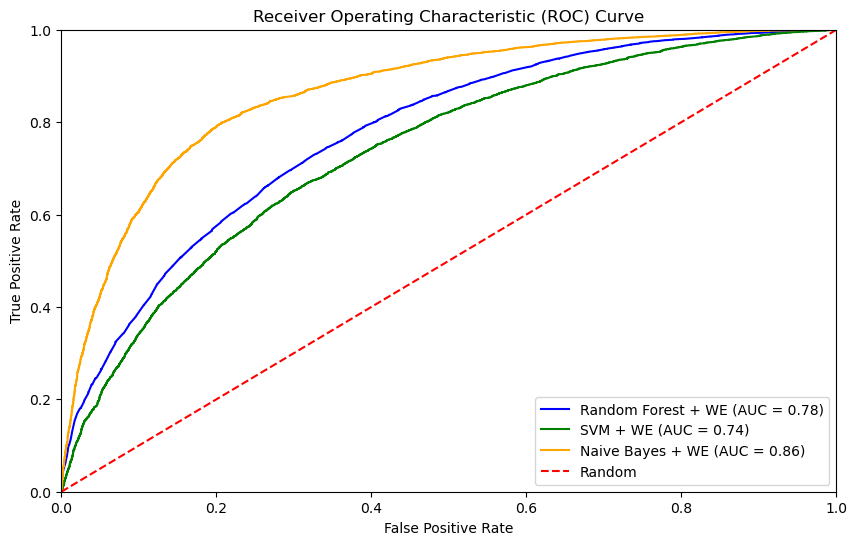

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the False Positive Rate (fpr) and True Positive Rate (tpr) for each classifier
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_scores)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)  # Add Naive Bayes fpr and tpr

# Compute the Area Under Curve (AUC) for each classifier
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_nb = auc(fpr_nb, tpr_nb)  # Calculate Naive Bayes AUC

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='b', label=f'Random Forest + WE (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color='g', label=f'SVM + WE (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, color='orange', label=f'Naive Bayes + WE (AUC = {roc_auc_nb:.2f})')  # Add Naive Bayes to the plot
plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
